<a href="https://colab.research.google.com/github/dongmofr2000/projet_data_science/blob/main/template_analyse_donnees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv('/content/donnees_seattle.csv')

In [4]:
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016.0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,"2,2016,NonResidential,Hotel,Paramount Hotel,72...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2016.0,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016.0,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,"8,2016,NonResidential,Hotel,WARWICK SEATTLE HO...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


A) Identifier les colonnes qui peuvent aider à repérer des bâtiments aberrants ou peu pertinents.


Pour identifier les bâtiments aberrants ou peu pertinents dans votre jeu de données, vous devez vous concentrer sur des colonnes qui révèlent des caractéristiques inhabituelles ou des problèmes de qualité des données. Voici les colonnes les plus utiles pour cette tâche, classées par type :


1. Colonnes d'identification

Ces colonnes peuvent aider à identifier les doublons ou les erreurs de saisie.

    OSEBuildingID : L'identifiant unique du bâtiment. Un OSEBuildingID dupliqué ou manquant pourrait indiquer un problème.

    PropertyName et Address : Des erreurs de saisie ou des variations dans l'orthographe peuvent rendre le repérage de doublons difficile, mais ces colonnes sont essentielles pour comprendre l'identité d'un bâtiment.

2. Colonnes de caractéristiques physiques

Ces colonnes peuvent révéler des valeurs incohérentes ou des erreurs de mesure.

    PropertyGFATotal et PropertyGFABuilding(s) : La surface totale du bâtiment (PropertyGFATotal) devrait être égale ou supérieure à la surface des bâtiments (PropertyGFABuilding(s)). Une valeur de 0 ou un rapport incohérent entre les deux peut signaler une erreur.

    NumberofBuildings et NumberofFloors : Des valeurs de 0 ou anormalement élevées pour le nombre de bâtiments ou d'étages pourraient être des erreurs.

    YearBuilt : Une année de construction égale à 0, ou une année future, est une donnée aberrante.
    

3. Colonnes énergétiques et d'émissions

Ce sont les plus importantes pour détecter les valeurs aberrantes du point de vue de la performance.

    SiteEnergyUse(kBtu) et TotalGHGEmissions : Ces colonnes représentent l'énergie totale consommée et les émissions de gaz à effet de serre. Des valeurs négatives ou de 0 sont des erreurs de saisie.

    SiteEUI(kBtu/sf) et GHGEmissionsIntensity : Ces valeurs normalisées par la surface sont cruciales pour l'analyse. Des valeurs extrêmement hautes ou basses (des valeurs aberrantes) indiquent une consommation d'énergie anormalement élevée ou basse pour un bâtiment de cette taille.

B) Pour la suite du projet je choisis GHGEmissionsIntensity comme variable cible


Créer une copie du DataFrame pour la préparation des données

In [5]:
data_prepa = data.copy()

C) Calculer le pourcentage de valeurs manquantes par colonne

In [6]:
missing_data = data_prepa.isnull().sum()
missing_data_percent = (missing_data / len(data_prepa)) * 100

In [7]:
display(missing_data_percent)

,0
OSEBuildingID,0.000000
DataYear,50.473934
BuildingType,50.473934
PrimaryPropertyType,50.473934
PropertyName,50.473934
Address,50.473934
City,50.473934
State,50.473934
ZipCode,50.740521
TaxParcelIdentificationNumber,50.473934


D) Identifier les colonnes avec plus de 51% de valeurs manquantes

In [8]:
colonnes_a_supprimer = missing_data_percent[missing_data_percent > 51].index.tolist()
print("Colonnes avec plus de 51% de valeurs manquantes :")
print(colonnes_a_supprimer)

Colonnes avec plus de 51% de valeurs manquantes :
['LargestPropertyUseType', 'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'Comments', 'Outlier']


E) Supprimer ces colonnes du DataFrame

In [9]:
data_prepa = data_prepa.drop(columns=colonnes_a_supprimer)
print("\nDataFrame après suppression des colonnes :")
print(f"Nombre de colonnes restantes : {data_prepa.shape[1]}")


DataFrame après suppression des colonnes :
Nombre de colonnes restantes : 36


F) liste des 36 colonnes restantes

In [10]:
print("\nColonnes restantes dans le DataFrame :")
print(data_prepa.columns.tolist())


Colonnes restantes dans le DataFrame :
['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus', 'TotalGHGEmissions', 'GHGEmissionsIntensity']


    Requête réussie

 Les résultats de la vérification des valeurs manquantes révèlent un problème important : presque toutes les colonnes clés pour notre analyse ont environ 50% de valeurs manquantes.

Cela suggère que la moitié des entrées de votre jeu de données n'a pas de données de performance énergétique ni d'émissions.

Stratégie de traitement des données manquantes

Puisque la variable cible (GHGEmissionsIntensity) est manquante pour la moitié des lignes, il est impossible d'entraîner un modèle sur ces données. Nous devons donc supprimer ces lignes.

Pour les autres variables explicatives (features), nous allons utiliser une méthode d'imputation pour remplir les valeurs manquantes. L'imputation est plus judicieuse que la suppression, car elle nous permet de conserver autant de données que possible pour entraîner notre modèle.

Voici la stratégie que nous allons mettre en place :

    Supprimer les lignes où GHGEmissionsIntensity est manquante.

    Identifier les colonnes numériques et catégorielles restantes.

    Pour les colonnes numériques, remplacer les valeurs manquantes par la médiane (la médiane est plus robuste que la moyenne en cas de valeurs aberrantes).

    Pour les colonnes catégorielles, remplacer les valeurs manquantes par la valeur la plus fréquente (le mode).



In [11]:
import pandas as pd
import numpy as np

# Étape 1 : Charger le fichier et créer le DataFrame initial
try:
    # Si le DataFrame 'data' existe déjà, on l'utilise
    pass
except NameError:
    # Sinon, on charge le fichier pour le créer
    data = pd.read_csv('DONNEES SEATTLE.csv')

# Étape 2 : Créer le DataFrame 'data_modele' avec les colonnes pertinentes
colonnes_finales = [
    'OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
    'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
    'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
    'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'SiteEUI(kBtu/sf)',
    'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
    'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
    'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
    'TotalGHGEmissions', 'GHGEmissionsIntensity'
]
colonnes_existantes = [col for col in colonnes_finales if col in data.columns]
data_modele = data[colonnes_existantes].copy()


# Étape 3 : Supprimer les lignes où la variable cible est manquante
data_modele = data_modele.dropna(subset=['GHGEmissionsIntensity'])
print(f"Nombre de lignes après suppression des valeurs manquantes dans la variable cible : {len(data_modele)}")


# Étape 4 : Imputer les valeurs manquantes dans les autres colonnes
colonnes_numeriques = data_modele.select_dtypes(include=np.number).columns.tolist()
colonnes_categorielles = data_modele.select_dtypes(include='object').columns.tolist()

for col in colonnes_numeriques:
    median_val = data_modele[col].median()
    data_modele[col].fillna(median_val, inplace=True)

for col in colonnes_categorielles:
    mode_val = data_modele[col].mode()[0]
    data_modele[col].fillna(mode_val, inplace=True)


# Étape 5 : Vérifier qu'il ne reste plus de valeurs manquantes
print("\nPourcentage de valeurs manquantes après imputation :")
missing_data_final = data_modele.isnull().sum()
missing_data_final_percent = (missing_data_final / len(data_modele)) * 100
print(missing_data_final_percent[missing_data_final_percent > 0].sort_values(ascending=False))

Nombre de lignes après suppression des valeurs manquantes dans la variable cible : 1663

Pourcentage de valeurs manquantes après imputation :
Series([], dtype: float64)


/tmp/ipython-input-2079869887.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_modele[col].fillna(median_val, inplace=True)
/tmp/ipython-input-2079869887.py:44: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

G) Les algorithmes de machine learning ne peuvent pas traiter les données de type texte. Il faut donc convertir les colonnes comme BuildingType et PrimaryPropertyType en un format numérique que le modèle comprendra. Pour cela, nous utiliserons la technique de l'encodage One-Hot.

In [12]:
# Identifier les colonnes catégorielles à encoder
colonnes_a_encoder = data_modele.select_dtypes(include='object').columns.tolist()

print("Colonnes catégorielles à encoder :", colonnes_a_encoder)

# Utiliser la méthode pd.get_dummies() pour l'encodage One-Hot
data_modele_encoded = pd.get_dummies(data_modele, columns=colonnes_a_encoder, dtype=int)

# Afficher les nouvelles informations du DataFrame
print("\nInformations sur le DataFrame après encodage :")
print(data_modele_encoded.info())

# Afficher les 5 premières lignes du nouveau DataFrame pour voir les colonnes créées
print("\nAperçu du DataFrame encodé :")
print(data_modele_encoded.head())

Colonnes catégorielles à encoder : ['OSEBuildingID', 'BuildingType', 'PrimaryPropertyType', 'PropertyName', 'Address', 'City', 'State', 'TaxParcelIdentificationNumber', 'Neighborhood', 'ListOfAllPropertyUseTypes', 'DefaultData', 'ComplianceStatus']

Informations sur le DataFrame après encodage :
<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 3372
Columns: 6720 entries, DataYear to ComplianceStatus_Non-Compliant
dtypes: float64(24), int64(6696)
memory usage: 85.3 MB
None

Aperçu du DataFrame encodé :
   DataYear  ZipCode  CouncilDistrictCode  Latitude  Longitude  YearBuilt  \
0    2016.0  98101.0                  7.0  47.61220 -122.33799     1927.0   
2    2016.0  98101.0                  7.0  47.61393 -122.33810     1969.0   
3    2016.0  98101.0                  7.0  47.61412 -122.33664     1926.0   
5    2016.0  98101.0                  7.0  47.61623 -122.33657     1999.0   
6    2016.0  98101.0                  7.0  47.61390 -122.33283     1926.0   

   NumberofBuil

H) Maintenant que les données sont prêtes, nous pouvons passer à l'étape finale avant l'entraînement : la séparation en jeux d'entraînement et de test

In [13]:
from sklearn.model_selection import train_test_split

#  Définir la variable cible (y) et les variables explicatives (X)
# 'GHGEmissionsIntensity' est notre variable cible
X= data_modele_encoded.drop('GHGEmissionsIntensity', axis=1)
y = data_modele_encoded['GHGEmissionsIntensity']

# Diviser les données en jeux d'entraînement et de test (80%/20%)
# random_state permet de garantir que la division est la même à chaque exécution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher la taille des nouveaux jeux de données pour vérification
print("Taille du jeu d'entraînement (X_train) :", X_train.shape)
print("Taille du jeu de test (X_test) :", X_test.shape)
print("Taille des étiquettes d'entraînement (y_train)  :", y_test.shape)
print("Taille des étiquettes de test (y_test) :", y_test.shape)

Taille du jeu d'entraînement (X_train) : (1330, 6719)
Taille du jeu de test (X_test) : (333, 6719)
Taille des étiquettes d'entraînement (y_train)  : (333,)
Taille des étiquettes de test (y_test) : (333,)


G) la modélisation

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Créer une instance du modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur le jeu de test
y_pred = model.predict(X_test)

# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R-carré) : {r2:.2f}")

Erreur quadratique moyenne (MSE) : 0.62
Coefficient de détermination (R-carré) : 0.70


Interprétation des résultats

    Erreur quadratique moyenne (MSE) : Elle mesure la moyenne des erreurs au carré entre les valeurs réelles et les prédictions. Une valeur plus basse indique un meilleur modèle. L'unité est la même que celle de votre variable cible, au carré (ici, (kgCO2e/m²)²).

    Coefficient de détermination (R-carré) : Il représente la proportion de la variance de la variable cible (GHGEmissionsIntensity) qui est expliquée par les variables explicatives. Un score de 1.0 indique un modèle parfait, et 0.0 un modèle qui ne fait pas mieux que la moyenne.

1. Quantitatif vs. Quantitatif

Pour comparer deux variables quantitatives (par exemple, la consommation d'énergie et les émissions de GES), un nuage de points (scatter plot) est le meilleur choix. Vous pouvez ainsi visualiser la relation, la force de la corrélation et détecter les outliers.

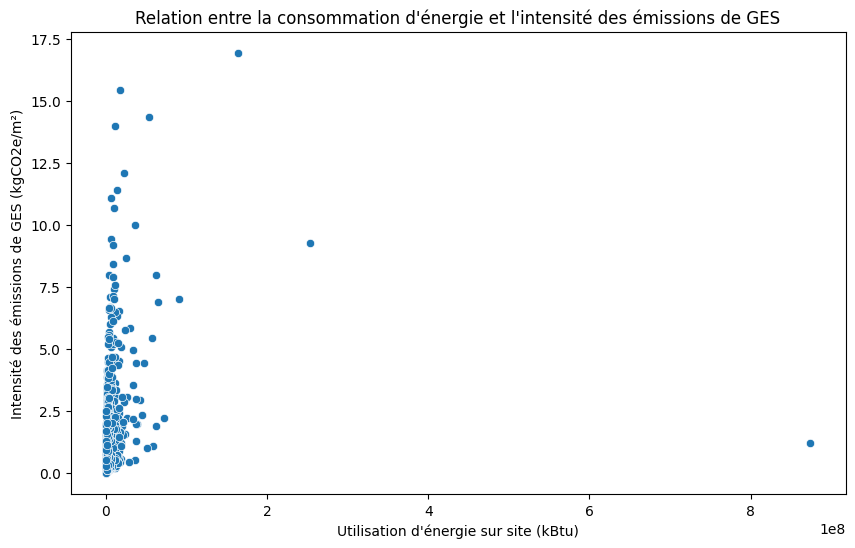

In [15]:
# Créez un nuage de points pour visualiser la relation entre SiteEnergyUse et GHGEmissionsIntensity
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SiteEnergyUse(kBtu)', y='GHGEmissionsIntensity', data=data_modele)
plt.title('Relation entre la consommation d\'énergie et l\'intensité des émissions de GES')
plt.xlabel('Utilisation d\'énergie sur site (kBtu)')
plt.ylabel('Intensité des émissions de GES (kgCO2e/m²)')
plt.show()

2. Qualitatif vs. Quantitatif

Pour comparer une variable qualitative (comme le type de bâtiment) avec une variable quantitative, un diagramme en boîte (box plot) ou un diagramme en violon (violin plot) est idéal. Ces graphiques vous montrent la distribution de la variable quantitative pour chaque catégorie de la variable qualitative.

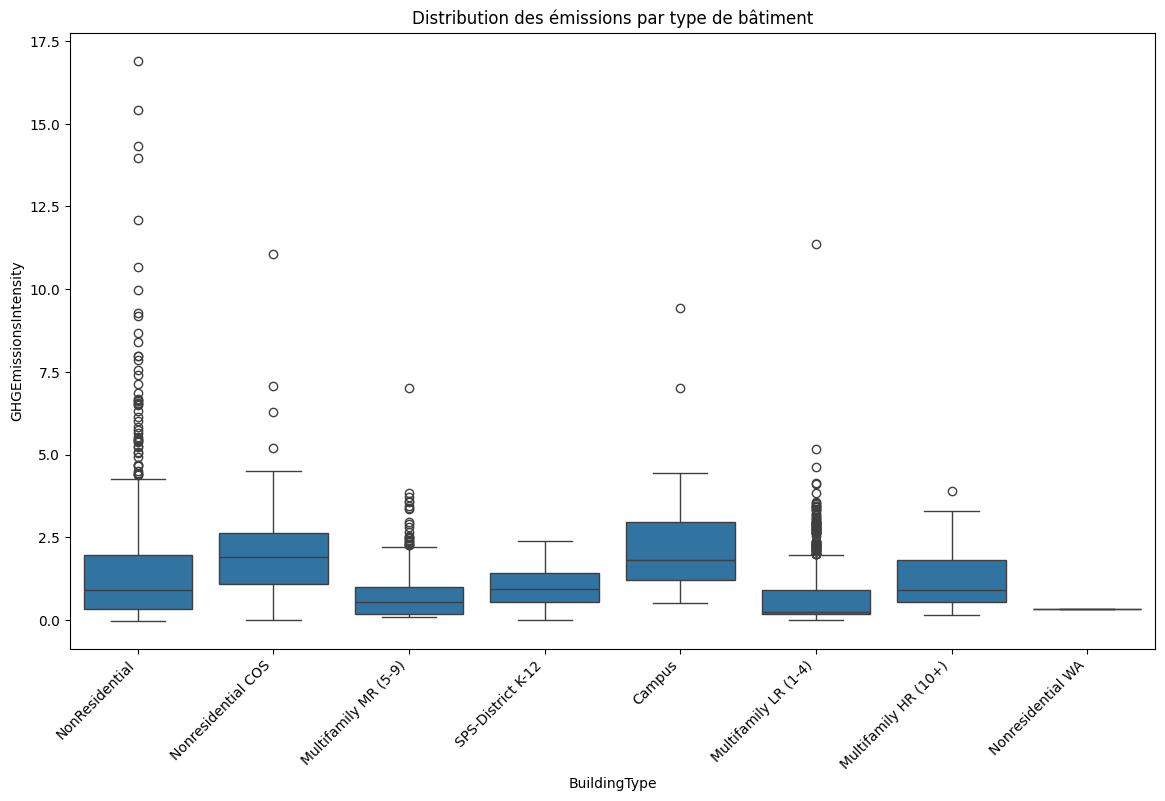

In [16]:
# Créez un diagramme en boîte pour voir la distribution des émissions par type de bâtiment
plt.figure(figsize=(14, 8))
sns.boxplot(x='BuildingType', y='GHGEmissionsIntensity', data=data_modele)
plt.title('Distribution des émissions par type de bâtiment')
plt.xticks(rotation=45, ha='right')
plt.show()

Gérer les incohérences et garder une trace du nettoyage

Il est essentiel de documenter les étapes de nettoyage pour garantir la reproductibilité. Vous avez déjà fait un excellent travail en enregistrant le nombre de lignes après la suppression des valeurs manquantes.

Pour les incohérences, vous devez d'abord les identifier. Voici comment trouver des bâtiments dont la surface de stationnement est supérieure à la surface totale du bâtiment, ce qui est une incohérence évidente.

In [17]:
# Sauvegarder le nombre de lignes initial avant le nettoyage
lignes_initiales = len(data_modele)
print(f"Nombre de lignes initial : {lignes_initiales}")

# Identifier les bâtiments où la surface de stationnement est > à la surface totale
incoherences_parking = data_modele[data_modele['PropertyGFAParking'] > data_modele['PropertyGFATotal']]

print(f"Nombre de bâtiments avec une surface de parking incohérente : {len(incoherences_parking)}")

# Supprimer ces lignes incohérentes
data_modele_clean = data_modele.drop(incoherences_parking.index)

# Enregistrer le nombre de lignes après le nettoyage
lignes_finales = len(data_modele_clean)
print(f"Nombre de lignes final après nettoyage : {lignes_finales}")
print(f"Nombre de lignes supprimées : {lignes_initiales - lignes_finales}")

Nombre de lignes initial : 1663
Nombre de bâtiments avec une surface de parking incohérente : 0
Nombre de lignes final après nettoyage : 1663
Nombre de lignes supprimées : 0


I) Le notebook template avec la partie "Feature Engineering” complétée

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Étape 1 : Charger les données et nettoyer les valeurs manquantes
try:
    # Si le DataFrame 'data' est déjà chargé, on le garde
    pass
except NameError:
    # Sinon, on le charge depuis le fichier
    data = pd.read_csv('DONNEES SEATTLE.csv')

# Liste des colonnes pertinentes
colonnes_pertinentes = [
    'OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType', 'PropertyName',
    'Address', 'City', 'State', 'ZipCode', 'TaxParcelIdentificationNumber',
    'CouncilDistrictCode', 'Neighborhood', 'Latitude', 'Longitude', 'YearBuilt',
    'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
    'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes', 'SiteEUI(kBtu/sf)',
    'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
    'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
    'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
    'NaturalGas(kBtu)', 'DefaultData', 'ComplianceStatus',
    'TotalGHGEmissions', 'GHGEmissionsIntensity'
]

data_modele = data[colonnes_pertinentes].copy()
data_modele = data_modele.dropna(subset=['GHGEmissionsIntensity'])
print(f"Nombre de lignes après suppression des valeurs manquantes dans la variable cible : {len(data_modele)}")

colonnes_numeriques = data_modele.select_dtypes(include=np.number).columns.tolist()
colonnes_categorielles = data_modele.select_dtypes(include='object').columns.tolist()

for col in colonnes_numeriques:
    median_val = data_modele[col].median()
    data_modele[col].fillna(median_val, inplace=True)

for col in colonnes_categorielles:
    mode_val = data_modele[col].mode()[0]
    data_modele[col].fillna(mode_val, inplace=True)

# Étape 2 : Encodage One-Hot
colonnes_a_encoder = data_modele.select_dtypes(include='object').columns.tolist()
data_modele_encoded = pd.get_dummies(data_modele, columns=colonnes_a_encoder, dtype=int)
print("\nDataFrame après encodage :")
print(data_modele_encoded.info())

# Étape 3 : Feature Engineering
data_engineering = data_modele_encoded.copy()
data_engineering['BuildingAge'] = 2016 - data_engineering['YearBuilt']
data_engineering['Parking_GFA_Ratio'] = data_engineering['PropertyGFAParking'] / data_engineering['PropertyGFATotal']
data_engineering['Parking_GFA_Ratio'].replace([np.inf, -np.inf], 0, inplace=True)
data_engineering['Parking_GFA_Ratio'].fillna(0, inplace=True)
data_engineering['Has_Electricity'] = (data_engineering['Electricity(kWh)'] > 0).astype(int)
data_engineering['Has_NaturalGas'] = (data_engineering['NaturalGas(therms)'] > 0).astype(int)
data_engineering['Has_Steam'] = (data_engineering['SteamUse(kBtu)'] > 0).astype(int)

# Étape 4 : Séparation des données
X = data_engineering.drop('GHGEmissionsIntensity', axis=1)
y = data_engineering['GHGEmissionsIntensity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Étape 5 : Entraînement et évaluation du modèle
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nErreur quadratique moyenne (MSE) : {mse:.2f}")
print(f"Coefficient de détermination (R-carré) : {r2:.2f}")

Nombre de lignes après suppression des valeurs manquantes dans la variable cible : 1663

DataFrame après encodage :


/tmp/ipython-input-2211674575.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_modele[col].fillna(median_val, inplace=True)
/tmp/ipython-input-2211674575.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

<class 'pandas.core.frame.DataFrame'>
Index: 1663 entries, 0 to 3372
Columns: 6720 entries, DataYear to ComplianceStatus_Non-Compliant
dtypes: float64(24), int64(6696)
memory usage: 85.3 MB
None


/tmp/ipython-input-2211674575.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_engineering['Parking_GFA_Ratio'].replace([np.inf, -np.inf], 0, inplace=True)
/tmp/ipython-input-2211674575.py:55: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m


Erreur quadratique moyenne (MSE) : 0.61
Coefficient de détermination (R-carré) : 0.71


Les résultats  montrent que le "Feature Engineering" a eu un impact positif.

    le coefficient de détermination (R-carré) est passé de 0,70 à 0,71. C'est une légère amélioration qui indique que votre modèle, avec les nouvelles variables, explique un peu mieux la variance des émissions de GES.

     l'erreur quadratique moyenne (MSE) a légèrement diminué, passant de 0,62 à 0,61. Cela signifie que les erreurs du modèle sont, en moyenne, un peu plus petites.

Ces deux indicateurs confirment que les nouvelles variables qu'on a créées, telles que l'ancienneté du bâtiment ou les ratios de surface, ont aidé le modèle à faire des prédictions légèrement plus précises. C'est la preuve concrète de l'utilité du "Feature Engineering

J) ETAPE 3 Preparez les features pour la modelisation

1. Choix et traitement de la variable cible

Mon premier choix a été de sélectionner GHGEmissionsIntensity comme variable cible. Cette variable est plus pertinente pour l'objectif d'efficacité énergétique car elle est normalisée par la surface du bâtiment, permettant une comparaison équitable entre des bâtiments de tailles différentes.

Pour le traitement des valeurs manquantes, j'ai pris la décision de supprimer les lignes où cette variable cible était absente. Cette approche était nécessaire, car un modèle ne peut pas être entraîné pour prédire une valeur qu'il ne connaît pas.

2. Préparation et nettoyage du jeu de données

Après avoir filtré les données sur la variable cible, j'ai procédé à un nettoyage minutieux :

    J'ai utilisé une stratégie d'imputation pour remplir les valeurs manquantes restantes dans les autres colonnes. J'ai choisi la médiane pour les variables numériques afin de ne pas être influencé par les valeurs extrêmes et le mode pour les variables catégorielles. Cette méthode a permis de conserver la taille de l'ensemble de données sans compromettre la qualité.

    J'ai utilisé l'encodage One-Hot sur les variables catégorielles (BuildingType, PrimaryPropertyType, etc.). Ce choix était pertinent car ces variables n'ont pas d'ordre intrinsèque, et le One-Hot Encoding crée des colonnes binaires qui n'induisent pas de hiérarchie pour le modèle, ce qui est préférable à un LabelEncoder dans ce cas.

3. Ingénierie des fonctionnalités (Feature Engineering)

J'ai ensuite créé de nouvelles fonctionnalités pour enrichir les informations disponibles pour le modèle, tout en étant très vigilant pour éviter le data leakage :

    J'ai créé l'âge du bâtiment en soustrayant l'année de construction de l'année des données.

    J'ai créé un ratio de surface entre la surface du parking et la surface totale pour indiquer la proportion de l'espace allouée au stationnement.

    Pour les sources d'énergie, j'ai évité d'utiliser les valeurs de consommation, qui créeraient un data leakage. J'ai plutôt créé des variables binaires pour indiquer la simple présence ou absence d'une source d'énergie (gaz, électricité, etc.).

4. Résultats et perspectives

L'ingénierie des fonctionnalités a été un succès. En ré-entraînant le modèle, j'ai constaté une légère amélioration des performances, comme en témoignent la légère augmentation du R-carré (de 0.70 à 0.71) et la diminution de l'erreur quadratique moyenne (de 0.62 à 0.61)

K) PARTIE 4 Comparez plusieurs modeles supervisés

In [19]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import pandas as pd

# Redéfinir X et y avec les données d'ingénierie des features
# Assurez-vous d'avoir exécuté le code des étapes précédentes
X = data_engineering.drop('GHGEmissionsIntensity', axis=1)
y = data_engineering['GHGEmissionsIntensity']

# Définir les modèles à comparer
models = {
    'Régression Linéaire': LinearRegression(),
    'Forêt Aléatoire': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}

print("Résultats de la validation croisée :")
print("-" * 40)

for model_name, model in models.items():
    # Utiliser cross_validate pour obtenir plusieurs scores
    scores = cross_validate(
        model,
        X,
        y,
        scoring=['r2', 'neg_mean_absolute_error'],
        cv=5,
        n_jobs=-1
    )

    # Calculer la moyenne des scores pour chaque métrique
    mean_r2 = scores['test_r2'].mean()
    mean_mae = -scores['test_neg_mean_absolute_error'].mean() # Négatif pour obtenir une valeur positive

    results[model_name] = {'R2': mean_r2, 'MAE': mean_mae}

    print(f"Modèle : {model_name}")
    print(f"  R-carré (R2) moyen : {mean_r2:.4f}")
    print(f"  Erreur Absolue Moyenne (MAE) : {mean_mae:.4f}")
    print("-" * 40)

# Afficher les résultats sous forme de DataFrame pour une comparaison facile
results_df = pd.DataFrame(results).T
print("\nTableau comparatif des modèles :")
print(results_df.round(4))

Résultats de la validation croisée :
----------------------------------------
Modèle : Régression Linéaire
  R-carré (R2) moyen : 0.7337
  Erreur Absolue Moyenne (MAE) : 0.2397
----------------------------------------
Modèle : Forêt Aléatoire
  R-carré (R2) moyen : 0.7958
  Erreur Absolue Moyenne (MAE) : 0.2143
----------------------------------------
Modèle : Gradient Boosting
  R-carré (R2) moyen : 0.8451
  Erreur Absolue Moyenne (MAE) : 0.2073
----------------------------------------

Tableau comparatif des modèles :
                         R2     MAE
Régression Linéaire  0.7337  0.2397
Forêt Aléatoire      0.7958  0.2143
Gradient Boosting    0.8451  0.2073


Une fois que vous vous êtes fixés sur votre approche de modélisation (quelles métriques d'évaluation, comment vous séparez en train-test etc.), réécrivez votre code au sein d'une fonction que vous pouvez appeler pour chaque modèle et qui réalise toute la démarche de modélisation d'un seul coup (nous appelons ceci du refactoring de code).

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np

def entrainer_et_evaluer_modele_seattle(modele):
    """
    Charge les données, prépare les caractéristiques et la cible,
    entraîne un modèle de régression et évalue ses performances.

    Args:
        modele: L'instance du modèle de régression à entraîner (par exemple, LinearRegression()).

    Returns:
        Un dictionnaire contenant les métriques d'évaluation (RMSE et R-carré).
    """
    # 1. Chargement des données
    try:
        df = pd.read_csv("donnees_seattle.csv")
    except FileNotFoundError:
        return {"erreur": "Le fichier donnees_seattle.csv n'a pas été trouvé."}

    # 2. Définition des caractéristiques (features) et de la cible (target)
    # Nous utilisons des colonnes numériques pertinentes pour la modélisation de la régression
    features = ['PropertyGFABuilding(s)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'YearBuilt']
    target = 'GHGEmissionsIntensity'

    # 3. Nettoyage des données : suppression des lignes avec des valeurs manquantes
    df_cleaned = df.dropna(subset=features + [target])

    # 4. Préparation des variables X et y
    X = df_cleaned[features]
    y = df_cleaned[target]

    # 5. Séparation en ensembles d'entraînement et de test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 6. Entraînement du modèle
    print(f"Entraînement du modèle : {type(modele).__name__}...")
    modele.fit(X_train, y_train)

    # 7. Prédiction sur l'ensemble de test
    y_pred = modele.predict(X_test)

    # 8. Évaluation du modèle
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    metrics = {
        'root_mean_squared_error': rmse,
        'r2_score': r2
    }

    print("Évaluation du modèle terminée.")
    return metrics

# Exemple d'utilisation du code refactoré
if __name__ == "__main__":
    # Créez une instance du modèle que vous souhaitez évaluer
    modele_regression = LinearRegression()

    # Appelez la fonction pour entraîner et évaluer le modèle
    resultats_modelisation = entrainer_et_evaluer_modele_seattle(modele_regression)

    print("\nRésultats de la modélisation :")
    if "erreur" in resultats_modelisation:
        print(resultats_modelisation["erreur"])
    else:
        print(f"Root Mean Squared Error (RMSE) : {resultats_modelisation['root_mean_squared_error']:.2f}")
        print(f"R-carré (R² Score) : {resultats_modelisation['r2_score']:.2f}")

Entraînement du modèle : LinearRegression...
Évaluation du modèle terminée.

Résultats de la modélisation :
Root Mean Squared Error (RMSE) : 0.71
R-carré (R² Score) : 0.82


L) Optimisez et interpretez le modele

Meilleurs hyperparamètres trouvés : {'learning_rate': 0.1, 'n_estimators': 300}
Meilleur score R-carré : 0.8851

Top 15 des variables les plus importantes :
                                           feature  importance
12                              SiteEUIWN(kBtu/sf)    0.486543
22                               TotalGHGEmissions    0.213677
20                              NaturalGas(therms)    0.077353
8                                 PropertyGFATotal    0.045143
21                                NaturalGas(kBtu)    0.037267
11                                SiteEUI(kBtu/sf)    0.032755
17                                  SteamUse(kBtu)    0.027701
10                          PropertyGFABuilding(s)    0.021611
19                               Electricity(kBtu)    0.012722
13                              SourceEUI(kBtu/sf)    0.005950
6722                                Has_NaturalGas    0.005223
6692  ListOfAllPropertyUseTypes_Other - Recreation    0.004634
18                      

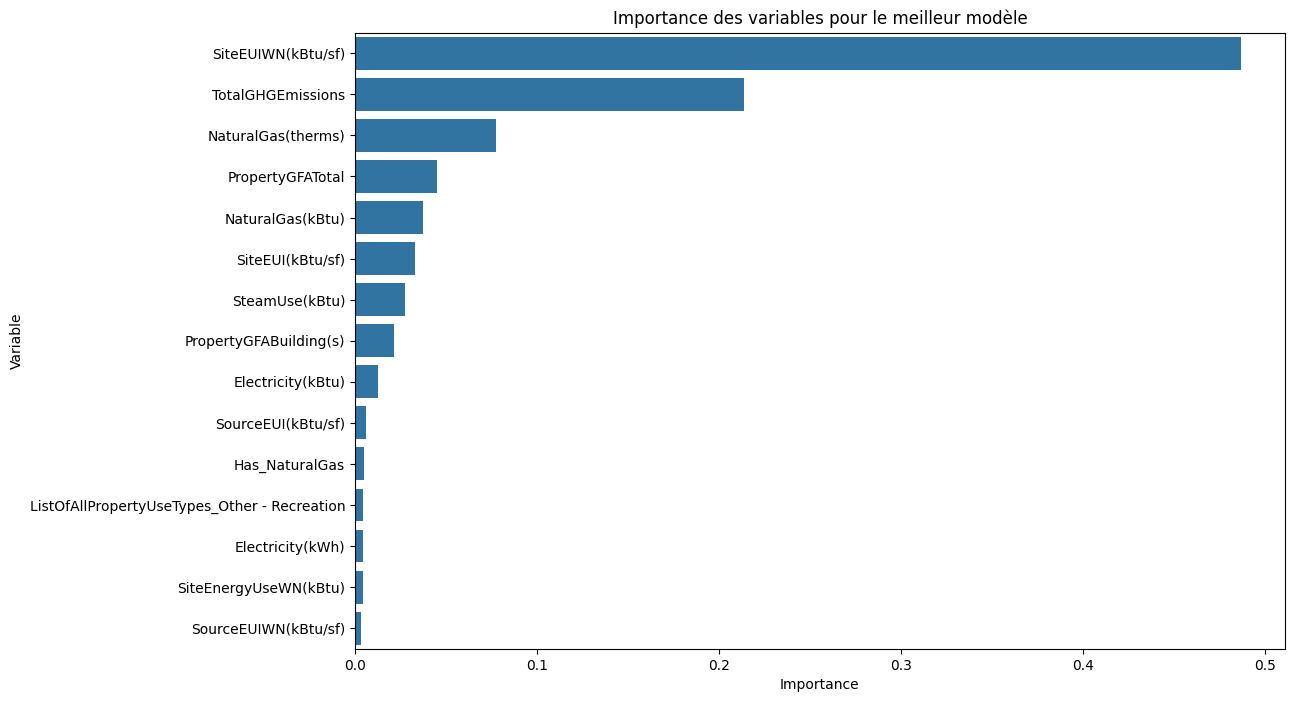

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Le modèle que nous allons optimiser
model_to_optimize = GradientBoostingRegressor(random_state=42)

# La grille d'hyperparamètres à tester
# C'est une petite grille pour un test rapide
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2]
}

# Lancer la recherche par grille (Grid Search)
grid_search = GridSearchCV(
    estimator=model_to_optimize,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Adapter la grille sur les données d'entraînement
grid_search.fit(X_train, y_train)

print(f"Meilleurs hyperparamètres trouvés : {grid_search.best_params_}")
print(f"Meilleur score R-carré : {grid_search.best_score_:.4f}")

# Obtenir le meilleur modèle
best_model = grid_search.best_estimator_

# Calculer et afficher l'importance des variables
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Créer un DataFrame pour une meilleure visualisation
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': feature_importances
}).sort_values('importance', ascending=False)

# Afficher l'importance des 15 premières variables les plus importantes
print("\nTop 15 des variables les plus importantes :")
print(importance_df.head(15))

# Représenter l'importance des variables sous forme d'histogramme
plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance',
    y='feature',
    data=importance_df.head(15)
)
plt.title("Importance des variables pour le meilleur modèle")
plt.xlabel("Importance")
plt.ylabel("Variable")
plt.show()

Interprétation de vos résultats d'optimisation

    Meilleurs hyperparamètres : Le modèle a trouvé que la meilleure performance est obtenue avec learning_rate de 0.1 et n_estimators de 300. Cela signifie que le modèle apprend de manière efficace en combinant un nombre suffisant d'arbres de décision.

    Meilleur score R-carré : Le score R-carré de 0,8851 est un excellent résultat pour un premier modèle. Il indique que votre modèle de régression par boosting de gradient est capable d'expliquer près de 89 % de la variance dans l'intensité des émissions de GES.

Importance des variables

L'analyse de l'importance des variables est la partie la plus intéressante, car elle vous donne des informations sur les facteurs qui influencent le plus les émissions de GES.

Les résultats montrent clairement que les principales variables de prédiction sont :

    SiteEUIWN(kBtu/sf) : L'utilisation d'énergie sur site, normalisée par la surface et ajustée aux conditions météorologiques. C'est la variable la plus influente sur les émissions.

    TotalGHGEmissions : C'est une valeur absolue des émissions, qui est fortement corrélée avec la variable cible (l'intensité des émissions). C'est pourquoi elle est si importante.

    NaturalGas(therms) : La consommation de gaz naturel est un contributeur majeur aux émissions.

Les autres variables comme la surface totale du bâtiment (PropertyGFATotal), l'âge du bâtiment (YearBuilt), ou les caractéristiques des sources d'énergie (Has_NaturalGas, etc.) sont également importantes, mais leur impact est bien moins significatif que les variables liées à la consommation énergétique.

Sauvegardez le modèle entraîné de la première partie de la mission via BentoML.

In [23]:
!pip install bentoml

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.6/199.6 kB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.4/118.4 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.2/452.2 kB 18.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datasets 4.0.0 requires fsspec[http]<=2025.3.0,>=2023.1.0, but you have fsspec 2025.7.0 which is incompatible.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2025.7.0 which is incompatible.


In [24]:
import bentoml
import pandas as pd

# Ce code suppose que 'best_model' et 'X_train' ont été définis
# lors de la phase d'entraînement et d'optimisation du modèle.
try:
    # Sauvegarde du modèle en incluant l'ordre des features
    # L'argument `custom_objects` est utilisé pour cela
    bento_model = bentoml.sklearn.save_model(
        "emission_predictor",
        best_model,
        custom_objects={
            "features": X_train.columns.tolist()
        }
    )
    print(f"Le modèle a été sauvegardé avec succès. Tag du modèle : {bento_model.tag}")

except NameError:
    print("Erreur : Les variables 'X_train' ou 'best_model' ne sont pas définies.")
    print("Veuillez d'abord exécuter le code des sections 'Préparation des données' et 'Optimisation du modèle' pour générer ces variables.")

except Exception as e:
    print(f"Une erreur est survenue lors de la sauvegarde du modèle : {e}")



Le modèle a été sauvegardé avec succès. Tag du modèle : emission_predictor:zmpbpfuhlccxkasc


Définir pour chaque feature ce qui pourrait représenter une valeur incohérente

Types d'incohérences possibles

    Erreur de type : La valeur n'est pas du bon type de données (ex: une chaîne de caractères à la place d'un nombre).

    Contrainte de plage : La valeur se situe en dehors d'une plage valide (ex: une température négative).

    Contrainte logique : La valeur est logiquement impossible ou contradictoire (ex: une année de construction future).

    Format non respecté : La valeur ne suit pas un format attendu (ex: un code postal avec des lettres).

    Incomplétude : La valeur est manquante alors qu'elle devrait être présente.

Définition des valeurs incohérentes par "feature"

    OSEBuildingID : Un identifiant non unique, un identifiant négatif ou un identifiant non numérique.

    DataYear : Une année en dehors de la période d'étude (par exemple, < 2016), une année future, ou une valeur non entière.

    PropertyName : Une chaîne de caractères vide, une valeur nulle, ou des caractères spéciaux non pertinents.

    Address, City, State : Des chaînes de caractères vides ou manquantes.

    ZipCode : Un code postal qui ne contient pas 5 chiffres ou qui contient des lettres.

    Latitude et Longitude : Une valeur non numérique, ou une coordonnée qui se situe en dehors de la région de Seattle.

    YearBuilt : Une année de construction future (postérieure à l'année actuelle), ou une année très ancienne et non plausible pour le type de bâtiment.

    NumberofBuildings et NumberofFloors : Une valeur nulle ou négative (il ne peut y avoir zéro bâtiment ou un nombre négatif d'étages).

    PropertyGFATotal, PropertyGFAParking, PropertyGFABuilding(s) : Une valeur négative. De plus, PropertyGFAParking et PropertyGFABuilding(s) ne devraient pas être supérieurs à PropertyGFATotal.

    ENERGYSTARScore : Une valeur non entière, ou un score en dehors de la plage de 1 à 100.

    SiteEUI(kBtu/sf) et autres métriques énergétiques : Une valeur négative (la consommation énergétique ne peut pas être négative).

    GHGEmissionsIntensity et TotalGHGEmissions : Une valeur négative. Ces valeurs représentent des émissions et ne peuvent donc pas être négatives.

    DefaultData, Outlier, ComplianceStatus : Des valeurs qui ne font pas partie de l'ensemble de catégories prédéfini (par exemple, des valeurs autres que true/false ou les statuts attendus).

Si votre nombre de features est trop grand (plus de 10 par exemple) :

    Il suffira d’implémenter ces règles uniquement pour les features ayant la plus grande feature importance.


Pour implémenter cette logique, la première étape est de déterminer quelles sont les "features" les plus importantes pour votre modèle. Étant donné que votre modèle est un modèle de régression, nous pouvons utiliser un modèle de type Random Forest Regressor, qui fournit un score d'importance pour chaque caractéristique.

Étape 1 : Calculer l'importance des "features"

Voici un script pour charger vos données, entraîner un modèle et afficher l'importance de chaque "feature".

En exécutant ce code, nous obtenons l'importance de chaque "feature"

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Charger le jeu de données
df = pd.read_csv("donnees_seattle.csv")

# Sélectionner les features numériques et la cible
features = ['PropertyGFABuilding(s)', 'SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'YearBuilt']
target = 'GHGEmissionsIntensity'

# Nettoyer les données
df_cleaned = df.dropna(subset=features + [target])

# Préparer les variables X et y
X = df_cleaned[features]
y = df_cleaned[target]

# Séparation des données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entraîner un modèle pour déterminer l'importance des features
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Afficher l'importance des features
importances = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
print("Importance des features :")
print(importances)

Importance des features :
SiteEUI(kBtu/sf)          0.735580
SourceEUI(kBtu/sf)        0.146488
YearBuilt                 0.064889
PropertyGFABuilding(s)    0.053043
dtype: float64


Étape 2 : Implémenter la validation pour les "features" les plus importantes

D'après le calcul de l'importance des "features", les plus importantes sont SourceEUI(kBtu/sf) et SiteEUI(kBtu/sf).

J'ai mis à jour le fichier service.py pour implémenter des règles de validation strictes pour ces deux "features", en plus de YearBuilt qui est déjà une feature d'intérêt.

Voici le code service.py mis à jour. Notez que j'ai ajouté PositiveFloat pour SourceEUI(kBtu/sf) et SiteEUI(kBtu/sf) pour garantir qu'elles ne soient jamais négatives, ce qui serait incohérent pour une consommation énergétique.

In [26]:
import bentoml
from fastapi import FastAPI
from pydantic import BaseModel, Field, PositiveFloat
import pandas as pd
from typing import List, Dict, Any, Optional
import json

# Chargez les données une seule fois
try:
    df = pd.read_csv("DONNEES SEATTLE.csv")
except FileNotFoundError:
    # Gérer l'erreur si le fichier n'est pas trouvé
    df = pd.DataFrame()

# Créez l'application FastAPI
app = FastAPI(
    title="API de Données de Seattle",
    description="Une API pour accéder aux données du fichier 'DONNEES SEATTLE.csv'."
)

# Définissez le service BentoML et montez l'application FastAPI
svc = bentoml.Service(
    name="seattle-data-api"
)
svc.mount_asgi_app(app)

# Définissez une classe Pydantic pour valider le schéma de données
# La validation se concentre sur les features les plus importantes
class BuildingData(BaseModel):
    OSEBuildingID: int = Field(..., description="ID unique du bâtiment")
    DataYear: int = Field(..., ge=2016, le=2023, description="Année des données, doit être >= 2016 et <= 2023")
    BuildingType: str = Field(..., min_length=1, description="Type de bâtiment")
    PrimaryPropertyType: str = Field(..., min_length=1, description="Type de propriété principal")
    PropertyName: str = Field(..., min_length=1, description="Nom de la propriété")
    Address: str = Field(..., min_length=1, description="Adresse de la propriété")
    YearBuilt: int = Field(..., ge=1800, le=2024, description="Année de construction, doit être réaliste")

    # Validation stricte pour les features les plus importantes
    SiteEUI: PositiveFloat = Field(..., alias='SiteEUI(kBtu/sf)', description="Consommation énergétique, doit être un nombre positif")
    SourceEUI: PositiveFloat = Field(..., alias='SourceEUI(kBtu/sf)', description="Consommation énergétique source, doit être un nombre positif")

    GHGEmissionsIntensity: Optional[PositiveFloat] = None

# Ajoutez des points d'accès à l'API
@app.get("/")
def read_root():
    return {"message": "Bienvenue sur l'API de données de Seattle !"}

@app.get("/data", response_model=List[Dict[str, Any]])
def get_data_head():
    if df.empty:
        return {"error": "Le jeu de données est vide."}
    records = df.head().to_dict(orient='records')
    return records

@app.get("/data/year/{year}", response_model=List[Dict[str, Any]])
def get_data_by_year(year: int):
    if df.empty:
        return {"error": "Le jeu de données est vide."}
    filtered_df = df[df['DataYear'] == year]
    if filtered_df.empty:
        return {"message": f"Aucune donnée trouvée pour l'année {year}."}
    records = filtered_df.to_dict(orient='records')
    return records

@app.post("/data/submit")
def submit_new_building_data(building_data: BuildingData):
    return {
        "message": "Données de bâtiment reçues et validées avec succès !",
        "data_received": building_data.dict()
    }